# COVID-19 Data analysis & visualization

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime, date, time, timedelta
from scipy import stats
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [2]:
# download the most recent COVID-19 dataset with wget using quite mode, timestamp (to only get the version diferent from local), and output directory
!wget -qNP data https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.xlsx

In [3]:
from pathlib import Path, PureWindowsPath
# linux path
filename = Path("data/owid-covid-data.xlsx").resolve()
# windows path (comment out if on linux)
filename = PureWindowsPath(filename)

### I. Worldwide

In [4]:
# initial date to start analysis with
begin_date = datetime.strptime('20-02-2020', '%d-%m-%Y')
end_date = date.today()

In [5]:
countries = ['Netherlands', 'Belgium', 'Germany']

In [6]:
df_world = pd.read_excel(filename, index_col="date", parse_dates=True)
df = df_world[df_world['location'].isin(countries)]
df.index = df.index.date
df.drop_duplicates('location', keep='last')

iso_code continent     location  total_cases  new_cases  \
2020-10-21      BEL    Europe      Belgium     267443.0    10271.0   
2020-10-23      DEU    Europe      Germany     403291.0    11242.0   
2020-10-23      NLD    Europe  Netherlands     262109.0     9268.0   

            new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
2020-10-21           10129.714       10540.0        42.0               36.571   
2020-10-23            7819.143        9954.0        49.0               31.429   
2020-10-23            8342.429        6909.0        46.0               32.286   

            total_cases_per_million  new_cases_per_million  \
2020-10-21                23076.088                886.224   
2020-10-23                 4813.464                134.178   
2020-10-23                15296.816                540.885   

            new_cases_smoothed_per_million  total_deaths_per_million  \
2020-10-21                         874.034                   909.435   
2020-10-23                          93.325                   118.806   
2020-10-23                         486.868                   403.213   

            new_deaths_per_million  new_deaths_smoothed_per_million  \
2020-10-21                   3.624                            3.156   
2020-10-23                   0.585                            0.375   
2020-10-23                   2.685                            1.884   

            total_tests  new_tests  total_tests_per_thousand  \
2020-10-21    4367693.0    78078.0                   376.863   
2020-10-23          NaN        NaN                       NaN   
2020-10-23          NaN        NaN                       NaN   

            new_tests_per_thousand  new_tests_smoothed  \
2020-10-21                   6.737             64376.0   
2020-10-23                     NaN                 NaN   
2020-10-23                     NaN                 NaN   

            new_tests_smoothed_per_thousand  tests_per_case  positive_rate  \
2020-10-21                            5.555           6.355          0.157   
2020-10-23                              NaN             NaN            NaN   
2020-10-23                              NaN             NaN            NaN   

                tests_units  stringency_index  population  population_density  \
2020-10-21  tests performed             52.78  11589616.0             375.564   
2020-10-23              NaN               NaN  83783945.0             237.016   
2020-10-23              NaN               NaN  17134873.0             508.544   

            median_age  aged_65_older  aged_70_older  gdp_per_capita  \
2020-10-21        41.8         18.571         12.849       42658.576   
2020-10-23        46.6         21.453         15.957       45229.245   
2020-10-23        43.2         18.779         11.881       48472.545   

            extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
2020-10-21              0.2                114.898                 4.29   
2020-10-23              NaN                156.139                 8.31   
2020-10-23              NaN                109.361                 5.29   

            female_smokers  male_smokers  handwashing_facilities  \
2020-10-21            25.1          31.4                     NaN   
2020-10-23            28.2          33.1                     NaN   
2020-10-23            24.4          27.3                     NaN   

            hospital_beds_per_thousand  life_expectancy  \
2020-10-21                        5.64            81.63   
2020-10-23                        8.00            81.33   
2020-10-23                        3.32            82.28   

            human_development_index  
2020-10-21                    0.916  
2020-10-23                    0.936  
2020-10-23                    0.931

In [7]:
print(f"Total cases per million per country as for {df.index[-1]}:")
print(f"{df.groupby('location')['total_cases_per_million'].agg('last').to_string()}")
print('\n')
print(f"Total deaths per million per country as for {df.index[-1]}:")
print(f"{df.groupby('location')['total_deaths_per_million'].agg('last').to_string()}")

Total cases per million per country as for 2020-10-23:
location
Belgium        23076.088
Germany         4813.464
Netherlands    15296.816


Total deaths per million per country as for 2020-10-23:
location
Belgium        909.435
Germany        118.806
Netherlands    403.213


In [8]:
df['mortality_rate'] = df['new_deaths'] / df['new_cases']
df['mortality_rate_per_million'] = df['new_deaths_per_million'] / df['new_cases_per_million']

In [9]:
def dfplot(metric, title, xlabel, ylabel, logy=False):
    fig, ax = plt.subplots(figsize=(15, 5))
    df[df.index > begin_date.date()].groupby('location')[metric].plot(ax=ax, legend=True, fontsize=14, logy=logy)
    plt.legend(loc=2, prop={'size': 14})
    plt.title(title, fontweight="bold")
    plt.xlabel(xlabel, fontsize=14, fontweight="bold")
    plt.ylabel(ylabel, fontsize=14, fontweight="bold")
    plt.grid(axis='y')  
    #set ticks every week
    ax.xaxis.set_major_locator(mdates.WeekdayLocator())
    #set major ticks format
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b 2020'))
    fig.autofmt_xdate()
    plt.show()

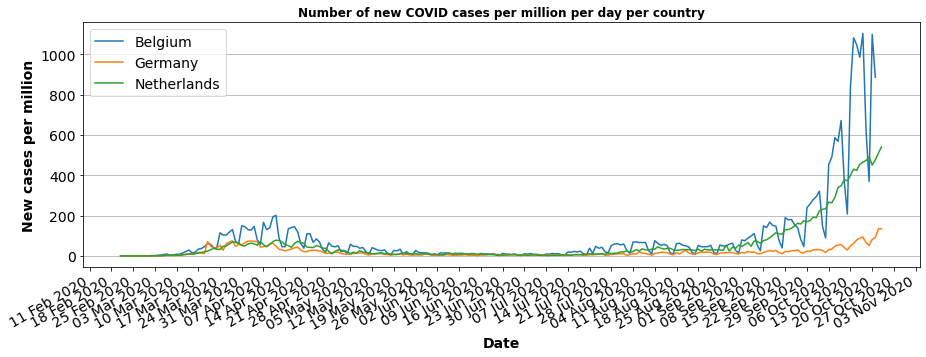

In [10]:
dfplot('new_cases_per_million', title="Number of new COVID cases per million per day per country", xlabel='Date', ylabel='New cases per million', logy=False)

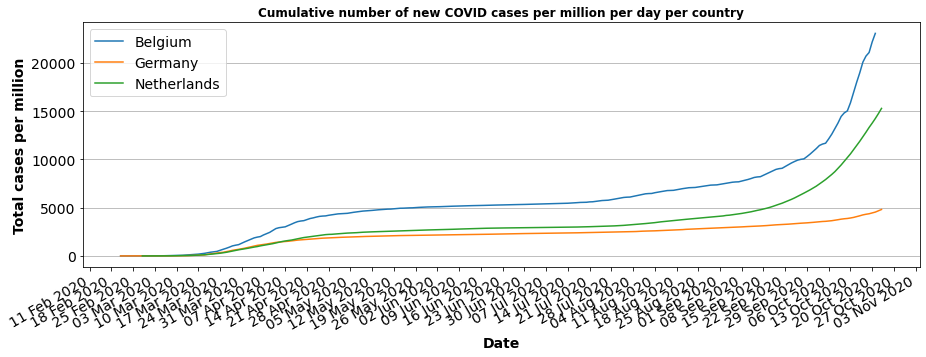

In [11]:
dfplot('total_cases_per_million', title="Cumulative number of new COVID cases per million per day per country", xlabel='Date', ylabel='Total cases per million')

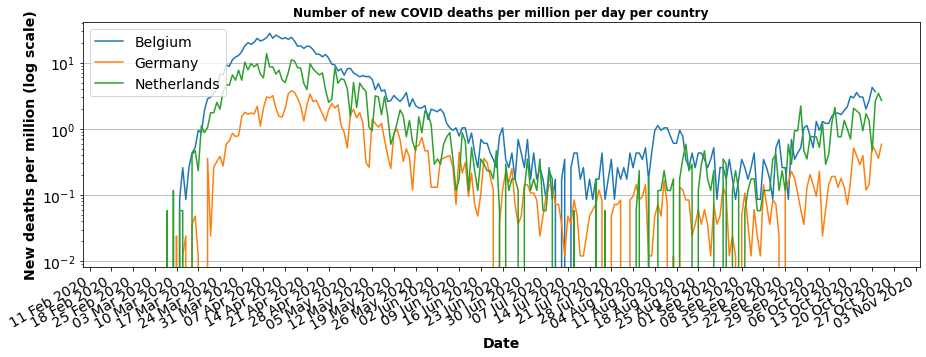

In [12]:
dfplot('new_deaths_per_million', title="Number of new COVID deaths per million per day per country", xlabel='Date', ylabel='New deaths per million (log scale)', logy=True)

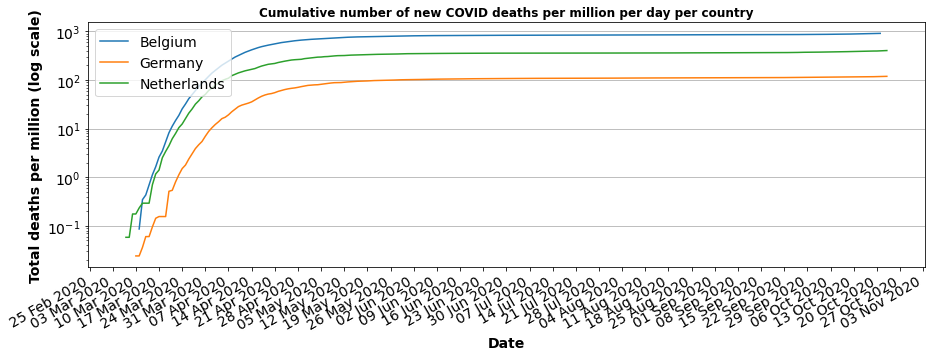

In [13]:
dfplot('total_deaths_per_million', title="Cumulative number of new COVID deaths per million per day per country", xlabel='Date', ylabel='Total deaths per million (log scale)', logy=True)

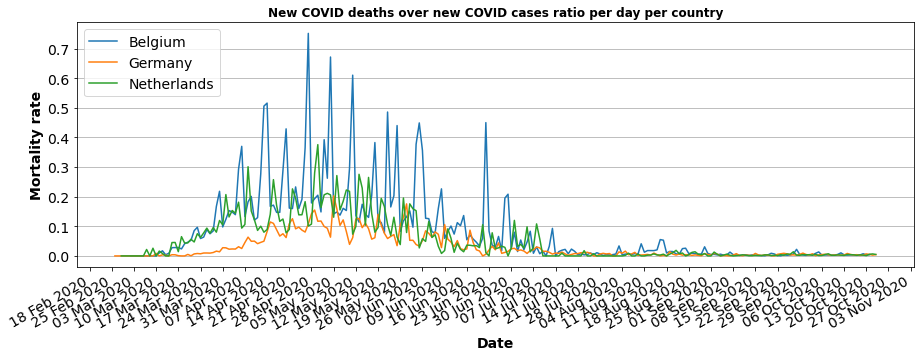

In [14]:
dfplot('mortality_rate', title="New COVID deaths over new COVID cases ratio per day per country", xlabel='Date', ylabel='Mortality rate')

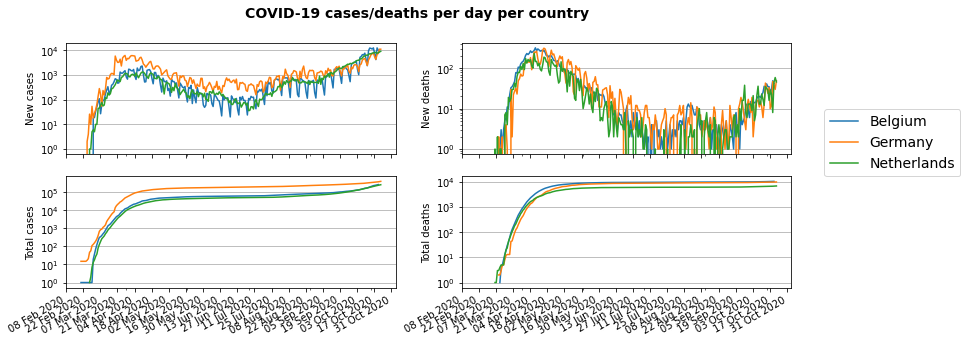

In [15]:
# combine altogether
fig, axs = plt.subplots(2, 2, sharex='col', sharey=False, figsize=(13,5))
(ax1, ax2), (ax3, ax4) = axs
df[df.index > begin_date.date()].groupby('location')['new_cases'].plot(ax=ax1, legend=False, fontsize=14, logy=True)
df[df.index > begin_date.date()].groupby('location')['new_deaths'].plot(ax=ax2, legend=False, fontsize=14, logy=True)
df[df.index > begin_date.date()].groupby('location')['total_cases'].plot(ax=ax3, legend=False, fontsize=14, logy=True)
df[df.index > begin_date.date()].groupby('location')['total_deaths'].plot(ax=ax4, legend=False, fontsize=14, logy=True)
ax1.grid(axis='y'); ax2.grid(axis='y'); ax3.grid(axis='y'); ax4.grid(axis='y')
labels = ['New cases', 'New deaths', 'Total cases', 'Total deaths']
for ax, label in zip(axs.flat, labels):
    ax.set(ylabel=label)
    xstart, xend = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(xstart, xend, 14))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b 2020'))
    ax.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=10))
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(10)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(10)
plt.rc('axes', labelsize=12)
plt.legend(loc=(1.1, 1.0), prop={'size': 14})
fig.suptitle('COVID-19 cases/deaths per day per country', fontsize=14, fontweight="bold")
fig.autofmt_xdate()
plt.show()

In [16]:
def myLogFormat(y,pos):
    # Find the number of decimal places required
    decimalplaces = int(np.maximum(-np.log10(y),0))     # =0 for numbers >=1
    # Insert that number into a format string
    formatstring = '{{:.{:1d}f}}'.format(decimalplaces)
    # Return the formatted tick label
    return formatstring.format(y)

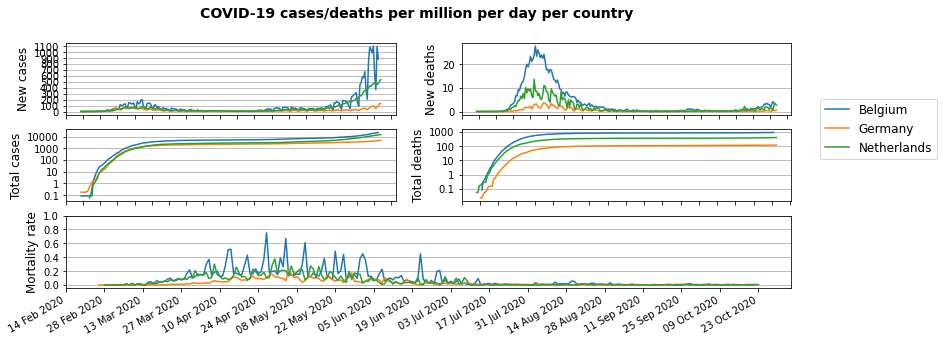

In [17]:
# combine altogether
fig = plt.figure(constrained_layout=True, figsize=(13, 5))
grid = fig.add_gridspec(nrows=3, ncols=2, wspace=0.2, hspace=0.2)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1])
ax3 = fig.add_subplot(grid[1, 0])
ax4 = fig.add_subplot(grid[1, 1])
ax5 = fig.add_subplot(grid[2, :])
df[df.index > begin_date.date()].groupby('location')['new_cases_per_million'].plot(ax=ax1, legend=False, fontsize=14, logy=False)
df[df.index > begin_date.date()].groupby('location')['new_deaths_per_million'].plot(ax=ax2, legend=False, fontsize=14, logy=False)
df[df.index > begin_date.date()].groupby('location')['total_cases_per_million'].plot(ax=ax3, legend=False, fontsize=14, logy=True)
df[df.index > begin_date.date()].groupby('location')['total_deaths_per_million'].plot(ax=ax4, legend=False, fontsize=14, logy=True)
df[df.index > begin_date.date()].groupby('location')['mortality_rate_per_million'].plot(ax=ax5, legend=False, fontsize=14, logy=False)
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
# ax5.text(df.index.max()+timedelta(days=30), 0.5,
#          'Mortality rate =\n new deaths / cases', ha="center", va="center", size=12,
#         bbox=bbox_props)
ax1.grid(axis='y'); ax2.grid(axis='y'); ax3.grid(axis='y'); ax4.grid(axis='y'); ax5.grid(axis='y')
axes = [ax1, ax2, ax3, ax4, ax5]
labels = ['New cases', 'New deaths', 'Total cases', 'Total deaths', 'Mortality rate']
for ax, label in zip(axes, labels):
    ax.set_ylabel(label)
    xstart, xend = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(xstart, xend, 14))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b 2020'))
    if ax == ax1:
        ax.yaxis.set_major_locator(ticker.MultipleLocator(base=100))
    elif ax == ax2:
        ax.yaxis.set_major_locator(ticker.MultipleLocator(base=10))
    elif ax in [ax3, ax4]:
        ax.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=10))
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(myLogFormat))
    else:
        ax.yaxis.set_ticks(np.arange(0,1.1,0.2))
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(10)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(10)
plt.rc('axes', labelsize=12)
plt.legend(loc=(1.04, 1.78), prop={'size': 12})
fig.suptitle('COVID-19 cases/deaths per million per day per country', fontsize=14, fontweight="bold")
fig.autofmt_xdate()
#plt.savefig("covid-19_cases_per_day_per_country.pdf", papertype = 'a4', orientation = 'portrait', bbox_inches='tight')
plt.show()

### II. NL

In [18]:
df_nl = df.query('iso_code == "NLD"')
df_nl.tail()

iso_code continent     location  total_cases  new_cases  \
2020-10-19      NLD    Europe  Netherlands     228234.0     8439.0   
2020-10-20      NLD    Europe  Netherlands     235954.0     7720.0   
2020-10-21      NLD    Europe  Netherlands     244103.0     8149.0   
2020-10-22      NLD    Europe  Netherlands     252841.0     8738.0   
2020-10-23      NLD    Europe  Netherlands     262109.0     9268.0   

            new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
2020-10-19            7683.429        6751.0        23.0               25.143   
2020-10-20            7808.571        6759.0         8.0               24.571   
2020-10-21            7920.143        6804.0        45.0               26.000   
2020-10-22            8129.714        6863.0        59.0               29.857   
2020-10-23            8342.429        6909.0        46.0               32.286   

            total_cases_per_million  new_cases_per_million  \
2020-10-19                13319.854                492.504   
2020-10-20                13770.397                450.543   
2020-10-21                14245.977                475.580   
2020-10-22                14755.931                509.954   
2020-10-23                15296.816                540.885   

            new_cases_smoothed_per_million  total_deaths_per_million  \
2020-10-19                         448.409                   393.992   
2020-10-20                         455.712                   394.459   
2020-10-21                         462.224                   397.085   
2020-10-22                         474.454                   400.528   
2020-10-23                         486.868                   403.213   

            new_deaths_per_million  new_deaths_smoothed_per_million  \
2020-10-19                   1.342                            1.467   
2020-10-20                   0.467                            1.434   
2020-10-21                   2.626                            1.517   
2020-10-22                   3.443                            1.742   
2020-10-23                   2.685                            1.884   

            total_tests  new_tests  total_tests_per_thousand  \
2020-10-19          NaN        NaN                       NaN   
2020-10-20          NaN        NaN                       NaN   
2020-10-21          NaN        NaN                       NaN   
2020-10-22          NaN        NaN                       NaN   
2020-10-23          NaN        NaN                       NaN   

            new_tests_per_thousand  new_tests_smoothed  \
2020-10-19                     NaN                 NaN   
2020-10-20                     NaN                 NaN   
2020-10-21                     NaN                 NaN   
2020-10-22                     NaN                 NaN   
2020-10-23                     NaN                 NaN   

            new_tests_smoothed_per_thousand  tests_per_case  positive_rate  \
2020-10-19                              NaN             NaN            NaN   
2020-10-20                              NaN             NaN            NaN   
2020-10-21                              NaN             NaN            NaN   
2020-10-22                              NaN             NaN            NaN   
2020-10-23                              NaN             NaN            NaN   

           tests_units  stringency_index  population  population_density  \
2020-10-19         NaN             63.89  17134873.0             508.544   
2020-10-20         NaN             63.89  17134873.0             508.544   
2020-10-21         NaN             63.89  17134873.0             508.544   
2020-10-22         NaN             63.89  17134873.0             508.544   
2020-10-23         NaN               NaN  17134873.0             508.544   

            median_age  aged_65_older  aged_70_older  gdp_per_capita  \
2020-10-19        43.2         18.779         11.881       48472.545   
2020-10-20        43.2         18.779         11.881       48472.5

In [19]:
start = pd.to_datetime('2020-10-15', format="%Y-%m-%d")
end = pd.to_datetime('today', format="%Y-%m-%d")
df_nl[start:end]

iso_code continent     location  total_cases  new_cases  \
2020-10-15      NLD    Europe  Netherlands     195933.0     7271.0   
2020-10-16      NLD    Europe  Netherlands     203712.0     7779.0   
2020-10-17      NLD    Europe  Netherlands     211690.0     7978.0   
2020-10-18      NLD    Europe  Netherlands     219795.0     8105.0   
2020-10-19      NLD    Europe  Netherlands     228234.0     8439.0   
2020-10-20      NLD    Europe  Netherlands     235954.0     7720.0   
2020-10-21      NLD    Europe  Netherlands     244103.0     8149.0   
2020-10-22      NLD    Europe  Netherlands     252841.0     8738.0   
2020-10-23      NLD    Europe  Netherlands     262109.0     9268.0   

            new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
2020-10-15            6588.000        6654.0        32.0               20.714   
2020-10-16            6868.857        6683.0        29.0               23.000   
2020-10-17            7157.286        6699.0        16.0               23.429   
2020-10-18            7387.571        6728.0        29.0               24.286   
2020-10-19            7683.429        6751.0        23.0               25.143   
2020-10-20            7808.571        6759.0         8.0               24.571   
2020-10-21            7920.143        6804.0        45.0               26.000   
2020-10-22            8129.714        6863.0        59.0               29.857   
2020-10-23            8342.429        6909.0        46.0               32.286   

            total_cases_per_million  new_cases_per_million  \
2020-10-15                11434.751                424.339   
2020-10-16                11888.737                453.986   
2020-10-17                12354.337                465.600   
2020-10-18                12827.349                473.012   
2020-10-19                13319.854                492.504   
2020-10-20                13770.397                450.543   
2020-10-21                14245.977                475.580   
2020-10-22                14755.931                509.954   
2020-10-23                15296.816                540.885   

            new_cases_smoothed_per_million  total_deaths_per_million  \
2020-10-15                         384.479                   388.331   
2020-10-16                         400.870                   390.023   
2020-10-17                         417.703                   390.957   
2020-10-18                         431.142                   392.650   
2020-10-19                         448.409                   393.992   
2020-10-20                         455.712                   394.459   
2020-10-21                         462.224                   397.085   
2020-10-22                         474.454                   400.528   
2020-10-23                         486.868                   403.213   

            new_deaths_per_million  new_deaths_smoothed_per_million  \
2020-10-15                   1.868                            1.209   
2020-10-16                   1.692                            1.342   
2020-10-17                   0.934                            1.367   
2020-10-18                   1.692                            1.417   
2020-10-19                   1.342                            1.467   
2020-10-20                   0.467                            1.434   
2020-10-21                   2.626                            1.517   
2020-10-22                   3.443                            1.742   
2020-10-23                   2.685                            1.884   

            total_tests  new_tests  total_tests_per_thousand  \
2020-10-15          NaN        NaN                       NaN   
2020-10-16          NaN        NaN                       NaN   
2020-10-17          NaN        NaN                       NaN   
2020-10-18    3104195.0        NaN                   181.162   
2020-10-19          NaN        NaN                       NaN   
2020-10-20          NaN        NaN                       NaN  

In [20]:
pd.set_option('display.max_colwidth', -1)
tmnl = pd.read_excel('data/Tijdslijn_Maatregelen_NL.xlsx', parse_dates=True)
tmnl

Datum                                 Beschrijving
0  2020-02-27  Eerste besmetting met COVID-19             
1  2020-03-06  Eerste overlijden als gevolg van COVID-19  
2  2020-03-09  Regering komt met hygiene maatregelen      
3  2020-03-12  Thuisblijven bij klachten                  
4  2020-03-15  Horeca, sportclubs, sauna's, e.d. gesloten 
5  2020-03-16  Alle scholen / kinderdagverblijven gesloten
6  2020-03-23  Start intelligente lockdown                
7  2020-05-11  Basisscholen, kappers, zwembaden open      
8  2020-06-01  Horeca mag weer open (op 1,5 m)            
9  2020-07-01  Evenementen, OV weer toegankelijk          
10 2020-09-01  Begin studiejaar

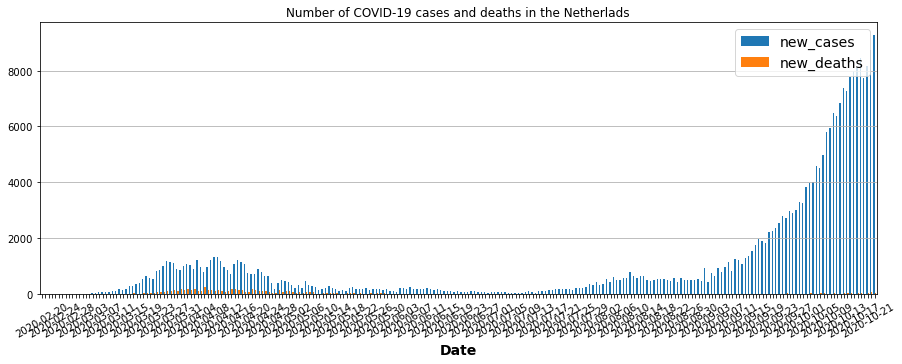

In [21]:
fig, ax = plt.subplots(figsize=(15, 5))
df_nl[['new_cases', 'new_deaths']][begin_date.date():].plot(kind='bar', ax=ax, width=0.8, legend=True)
# fewer date ticks
every_nth = 4
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.title("Number of COVID-19 cases and deaths in the Netherlads")
plt.legend(loc='upper right', prop={'size': 14})
plt.xlabel('Date', fontsize=14, fontweight="bold")
plt.grid(axis='y') 
plt.xticks(rotation=30)
plt.show()

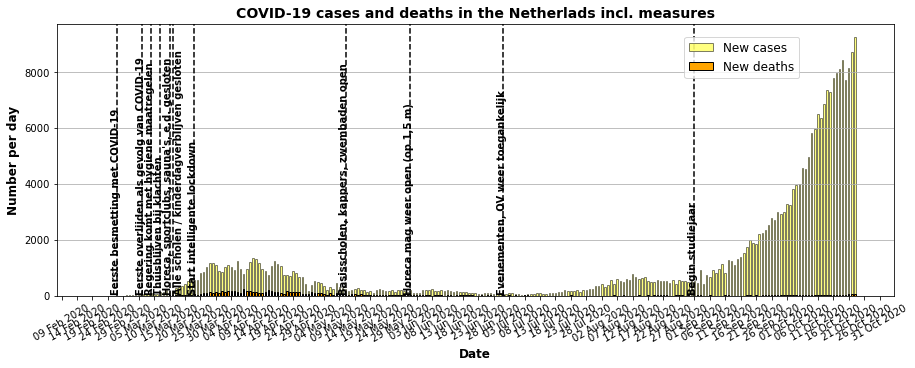

In [22]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(df_nl[begin_date.date():].index, df_nl[begin_date.date():]['new_cases'], width=0.5, alpha=0.5, color='yellow', edgecolor='black', align='center', label='New cases')
ax.bar(df_nl[begin_date.date():].index, df_nl[begin_date.date():]['new_deaths'], width=0.5, alpha=1.0, color='orange', edgecolor='black', align='center', label='New deaths')
# add timeline measures in NL 
for date, measure in zip(tmnl.Datum, tmnl.Beschrijving):
    ax.axvline(x=date.date(), ymax=df_nl['new_cases'].max(), color='black', linestyle='--')
    ax.text(date-timedelta(days=2)+(measure == "Alle scholen / kinderdagverblijven gesloten")*timedelta(days=2.5) \
            , 100, measure, color='black', fontsize=10, weight='heavy', rotation=90)
plt.title("COVID-19 cases and deaths in the Netherlads incl. measures", fontsize=14, fontweight="bold")
plt.legend(loc=(0.75, 0.8), prop={'size': 12})
plt.xlabel('Date', fontsize=12, fontweight="bold")
plt.ylabel('Number per day', fontsize=12, fontweight="bold")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b 2020'))
plt.xticks(rotation=30)
plt.grid(axis='y') 
#plt.savefig("covid-19_nl_incl_maatregelen.pdf", papertype = 'a4', orientation = 'portrait', bbox_inches='tight')
plt.show()

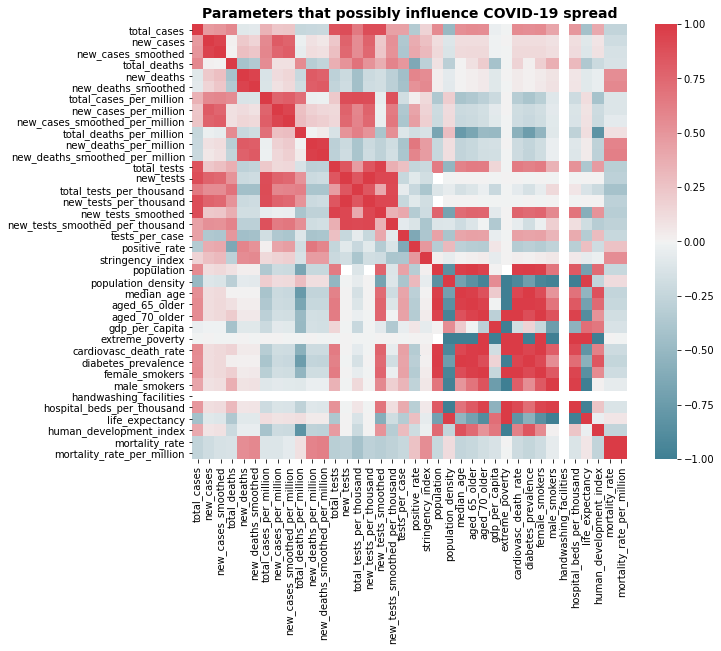

In [23]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr(method='pearson')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title("Parameters that possibly influence COVID-19 spread", fontsize=14, fontweight="bold")
#plt.savefig("covid-19_parameters.pdf", papertype = 'a4', orientation = 'portrait', bbox_inches='tight')
plt.show()

# Interactive plots

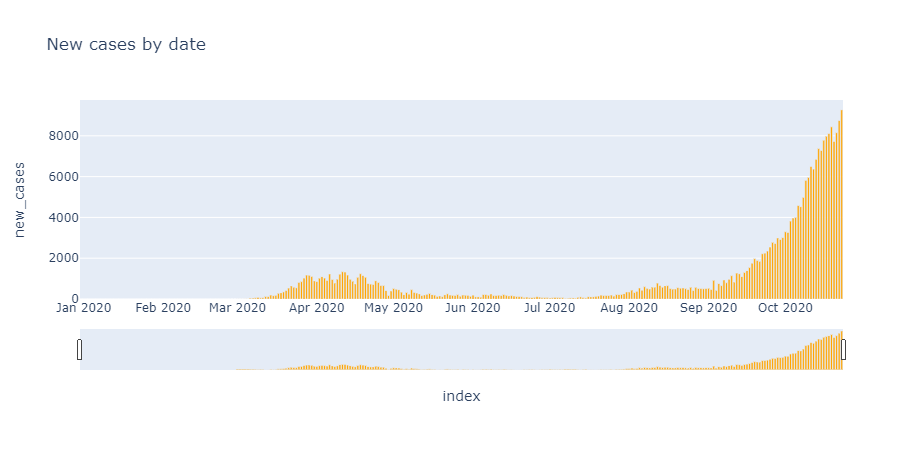

In [24]:
fig = px.bar(df_nl, x = df_nl.index, y = 'new_cases', title='New cases by date')
fig.update_traces(marker_color='orange')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

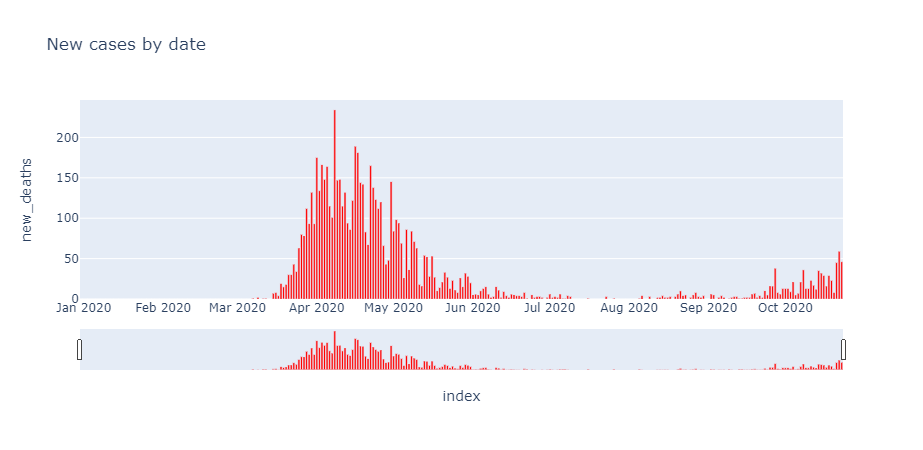

In [25]:
fig = px.bar(df_nl, x = df_nl.index, y = 'new_deaths', title='New cases by date')
fig.update_traces(marker_color='red')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [26]:
countries = df_world[(df_world.new_cases.notnull()) & (df_world.index > begin_date) & (df_world.continent == 'Europe')].reset_index()
countries['date'] = countries.date.dt.strftime('%Y-%m-%d')

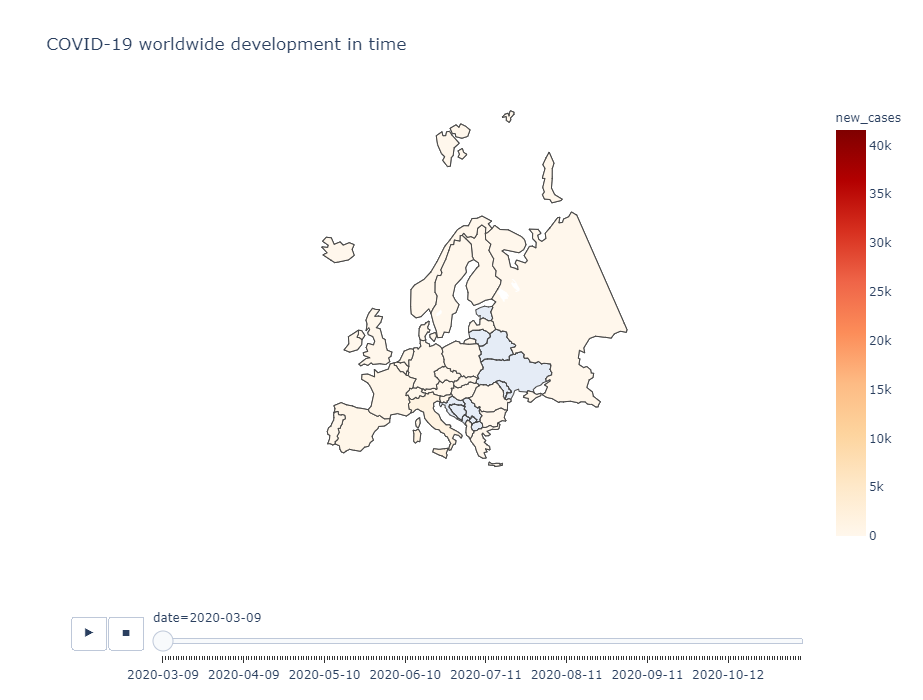

In [27]:
fig = px.choropleth(countries, locations="location",
                    locationmode="country names",
                    color="new_cases",
                    color_continuous_scale='OrRd', #px.colors.diverging.RdYlGn[::-1],
                    range_color=[0, np.max(countries.new_cases)],
                    animation_frame="date",
                    scope="europe",
                    title="COVID-19 worldwide development in time",
                    height=700)
fig.show()

# Predictive modelling

### I. Worldwide (regression)

In [28]:
df_w = df_world.drop_duplicates('location', keep='last')
df_w = df_w.reset_index()
df_w.drop('date', axis=1, inplace=True)
df_w = df_w.tail(-2) # remove World and International
df_w.head()

iso_code      continent              location  total_cases  new_cases  \
2  AGO      Africa         Angola                8338.0       289.0       
3  AIA      North America  Anguilla              3.0          0.0         
4  ALB      Europe         Albania               18250.0      302.0       
5  AND      Europe         Andorra               3811.0       0.0         
6  ARE      Asia           United Arab Emirates  120710.0     1578.0      

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
2  213.143             255.0         4.0         4.000                 
3  0.000              NaN            0.0         0.000                 
4  291.143             465.0         3.0         3.714                 
5  88.714              63.0          0.0         0.571                 
6  1324.714            474.0         2.0         3.143                 

   total_cases_per_million  new_cases_per_million  \
2  253.695                  8.793                   
3  199.973                  0.000                   
4  6341.650                 104.941                 
5  49323.756                0.000                   
6  12204.764                159.549                 

   new_cases_smoothed_per_million  total_deaths_per_million  \
2  6.485                           7.759                      
3  0.000                          NaN                         
4  101.169                         161.582                    
5  1148.182                        815.376                    
6  133.939                         47.925                     

   new_deaths_per_million  new_deaths_smoothed_per_million  total_tests  \
2  0.122                   0.122                           NaN            
3  0.000                   0.000                           NaN            
4  1.042                   1.291                           NaN            
5  0.000                   7.396                           NaN            
6  0.202                   0.318                           NaN            

   new_tests  total_tests_per_thousand  new_tests_per_thousand  \
2 NaN        NaN                       NaN                       
3 NaN        NaN                       NaN                       
4 NaN        NaN                       NaN                       
5 NaN        NaN                       NaN                       
6 NaN        NaN                       NaN                       

   new_tests_smoothed  new_tests_smoothed_per_thousand  tests_per_case  \
2 NaN                 NaN                              NaN               
3 NaN                 NaN                              NaN               
4 NaN                 NaN                              NaN               
5 NaN                 NaN                              NaN               
6 NaN                 NaN                              NaN               

   positive_rate tests_units  stringency_index  population  \
2 NaN             NaN        NaN                32866268.0   
3 NaN             NaN        NaN                15002.0      
4 NaN             NaN        NaN                2877800.0    
5 NaN             NaN        NaN                77265.0      
6 NaN             NaN        NaN                9890400.0    

   population_density  median_age  aged_65_older  aged_70_older  \
2  23.890              16.8        2.405          1.362           
3 NaN                 NaN         NaN            NaN              
4  104.871             38.0        13.188         8.643           
5  163.755            NaN         NaN            NaN              
6  112.442             34.0        1.144          0.526           

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
2  5819.495       NaN               276.045                 
3 NaN             NaN              NaN                      
4  11803.431       1.1              304.195                 
5 NaN             NaN               109.135                 
6  67293.483      NaN               317.840   

In [29]:
df_w.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [30]:
df_w = df_w.drop(['iso_code', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 
               'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_tests', 
               'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 
               'new_tests_smoothed_per_thousand', 'tests_units', 'stringency_index', 'tests_per_case', 
                  'positive_rate'], axis=1)
df_w.tail()

continent       location  total_cases  new_cases_smoothed  \
208  Africa    South Africa   710515.0     1761.571             
209  Africa    Zambia         16035.0      53.714               
210  Africa    Zimbabwe       8242.0       23.857               
211  NaN       World          41771932.0   390097.429           
212  NaN       International  696.0       NaN                   

     new_deaths_smoothed  new_cases_smoothed_per_million  \
208  76.286               29.702                           
209  0.000                2.922                            
210  0.714                1.605                            
211  5616.286             50.046                           
212 NaN                  NaN                               

     new_deaths_smoothed_per_million    population  population_density  \
208  1.286                            5.930869e+07  46.754               
209  0.000                            1.838396e+07  22.995               
210  0.048                            1.486293e+07  42.729               
211  0.721                            7.794799e+09  58.045               
212 NaN                              NaN           NaN                   

     median_age  aged_65_older  aged_70_older  gdp_per_capita  \
208  27.3        5.344          3.053          12294.876        
209  17.7        2.480          1.542          3689.251         
210  19.6        2.822          1.882          1899.775         
211  30.9        8.696          5.355          15469.207        
212 NaN         NaN            NaN            NaN               

     extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
208  18.9             200.380                5.52                  
209  57.5             234.499                3.94                  
210  21.4             307.846                1.82                  
211  10.0             233.070                8.51                  
212 NaN              NaN                    NaN                    

     female_smokers  male_smokers  handwashing_facilities  \
208  8.100           33.200        43.993                   
209  3.100           24.700        13.938                   
210  1.600           30.700        36.791                   
211  6.434           34.635        60.130                   
212 NaN             NaN           NaN                       

     hospital_beds_per_thousand  life_expectancy  human_development_index  
208  2.320                       64.13            0.699                    
209  2.000                       63.89            0.588                    
210  1.700                       61.49            0.535                    
211  2.705                       72.58           NaN                       
212 NaN                         NaN              NaN

In [31]:
print("% of nan values per column")
for column in df_w.columns:
    print(f"{column}: {df_w[column].isna().sum()} / {len(df_w)}")

% of nan values per column
continent: 2 / 211
location: 0 / 211
total_cases: 1 / 211
new_cases_smoothed: 2 / 211
new_deaths_smoothed: 2 / 211
new_cases_smoothed_per_million: 2 / 211
new_deaths_smoothed_per_million: 2 / 211
population: 1 / 211
population_density: 12 / 211
median_age: 25 / 211
aged_65_older: 28 / 211
aged_70_older: 26 / 211
gdp_per_capita: 28 / 211
extreme_poverty: 88 / 211
cardiovasc_death_rate: 25 / 211
diabetes_prevalence: 18 / 211
female_smokers: 70 / 211
male_smokers: 72 / 211
handwashing_facilities: 119 / 211
hospital_beds_per_thousand: 46 / 211
life_expectancy: 4 / 211
human_development_index: 31 / 211


In [32]:
X = df_w.drop('total_cases', axis=1)
y = df_w['total_cases']
y.fillna(0, inplace=True)

In [33]:
y.isnull().values.any()

False

In [34]:
X.head()

continent              location  new_cases_smoothed  \
2  Africa         Angola                213.143              
3  North America  Anguilla              0.000                
4  Europe         Albania               291.143              
5  Europe         Andorra               88.714               
6  Asia           United Arab Emirates  1324.714             

   new_deaths_smoothed  new_cases_smoothed_per_million  \
2  4.000                6.485                            
3  0.000                0.000                            
4  3.714                101.169                          
5  0.571                1148.182                         
6  3.143                133.939                          

   new_deaths_smoothed_per_million  population  population_density  \
2  0.122                            32866268.0  23.890               
3  0.000                            15002.0    NaN                   
4  1.291                            2877800.0   104.871              
5  7.396                            77265.0     163.755              
6  0.318                            9890400.0   112.442              

   median_age  aged_65_older  aged_70_older  gdp_per_capita  extreme_poverty  \
2  16.8        2.405          1.362          5819.495       NaN                
3 NaN         NaN            NaN            NaN             NaN                
4  38.0        13.188         8.643          11803.431       1.1               
5 NaN         NaN            NaN            NaN             NaN                
6  34.0        1.144          0.526          67293.483      NaN                

   cardiovasc_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
2  276.045                3.94                NaN             NaN             
3 NaN                    NaN                  NaN             NaN             
4  304.195                10.08                7.1             51.2           
5  109.135                7.97                 29.0            37.8           
6  317.840                17.26                1.2             37.4           

   handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
2  26.664                 NaN                          61.15             
3 NaN                     NaN                          81.88             
4 NaN                      2.89                        78.57             
5 NaN                     NaN                          83.73             
6 NaN                      1.20                        77.97             

   human_development_index  
2  0.581                    
3 NaN                       
4  0.785                    
5  0.858                    
6  0.863

In [35]:
X.shape

(211, 21)

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 2 to 212
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   continent                        209 non-null    object 
 1   location                         211 non-null    object 
 2   new_cases_smoothed               209 non-null    float64
 3   new_deaths_smoothed              209 non-null    float64
 4   new_cases_smoothed_per_million   209 non-null    float64
 5   new_deaths_smoothed_per_million  209 non-null    float64
 6   population                       210 non-null    float64
 7   population_density               199 non-null    float64
 8   median_age                       186 non-null    float64
 9   aged_65_older                    183 non-null    float64
 10  aged_70_older                    185 non-null    float64
 11  gdp_per_capita                   183 non-null    float64
 12  extreme_poverty       

### Pair correlations

In [37]:
#sns.pairplot(X)

In [38]:
# column normalization
# X_norm = X
# for col in X.columns[2:]:
#     X_norm[col] = stats.boxcox(X[col])[0]
# sns.pairplot(X_norm)

### Model comparison

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

categorical_features = X.columns[0:2].tolist()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_features = X.columns[2:].tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.65, random_state=42)

models = [DummyRegressor(), SGDRegressor(), ElasticNet()]

for model in models:
    # Append classifier to preprocessing pipeline.
    # Now we have a full prediction pipeline.
    rgr = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
    rgr.fit(X_train, y_train)
    
    print(f"Best {model} score: {rgr.score(X_test, y_test):.3f}")

Best DummyRegressor() score: -0.001
Best SGDRegressor() score: 0.905
Best ElasticNet() score: 0.988


### Regressor score vs. test size

Best test size ratio is: 95.0%


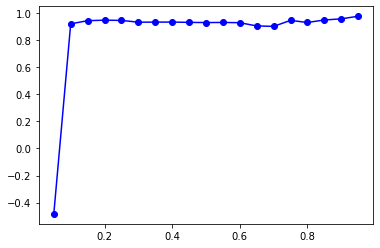

In [40]:
scores = []
sizes = np.linspace(0.05, 0.95, 19)
for size in sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
    regressor = SGDRegressor()
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', regressor)]).fit(X_train, y_train)
    scores.append(pipe.score(X_test, y_test))
 
plt.plot(sizes, scores, '-bo')
print(f"Best test size ratio is: {sizes[np.argmax(scores)]*100}%")

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
parameters = {
             'regressor__loss': ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
             'regressor__penalty': ['l2', 'l1', 'elasticnet'],
             'regressor__alpha': [0.0001, 0.001, 0.01],
             'regressor__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
             }
regressor = SGDRegressor()
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor',  regressor)])
gsrgr = GridSearchCV(pipe, parameters).fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % gsrgr.best_score_)
print(gsrgr.best_params_)
print('R2: ', r2_score(y_pred = gsrgr.predict(X_test), y_true = y_test))

Best parameter (CV score=-0.727):
{'regressor__alpha': 0.001, 'regressor__learning_rate': 'optimal', 'regressor__loss': 'epsilon_insensitive', 'regressor__penalty': 'l1'}
R2:  0.023477316983182006


In [42]:
regressor = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', SGDRegressor())]).fit(X_train, y_train)
print(f"Model score: {regressor.score(X_test, y_test):.3f}")
print('R2: ', r2_score(y_pred = regressor.predict(X_test), y_true = y_test))

Model score: 0.977
R2:  0.97696122995691


In [43]:
# Hyperparameter optimization across multiple models in scikit-learn
# http://www.davidsbatista.net/blog/2018/02/23/model_optimization/
class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=2, n_jobs=2, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [44]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)])

X_train = preprocessor.fit_transform(X_train)

models = {
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVC': SVC()
}

params = {
    'ExtraTreesClassifier': { 'n_estimators': [16, 32] },
    'RandomForestClassifier': { 'n_estimators': [16, 32] },
    'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
    'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ]
}

helper = EstimatorSelectionHelper(models, params)
helper.fit(X_train, y_train, scoring='accuracy')

helper.score_summary(sort_by='max_score')

Running GridSearchCV for ExtraTreesClassifier.
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    2.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for RandomForestClassifier.
Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   4 out of   4 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for AdaBoostClassifier.
Fitting 2 folds for each of 2 candidates, totalling 4 fits
Running GridSearchCV for GradientBoostingClassifier.
Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=2)]: Done   8 out of   8 | elapsed:    6.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for SVC.
Fitting 2 folds for each of 6 candidates, totalling 12 fits
ExtraTreesClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
SVC


[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:    0.2s finished


estimator  min_score  mean_score  max_score   std_score  \
6   GradientBoostingClassifier  0.0136986  0.0203628   0.027027   0.0066642    
7   GradientBoostingClassifier  0.0136986  0.0203628   0.027027   0.0066642    
8   GradientBoostingClassifier  0.0136986  0.0203628   0.027027   0.0066642    
9   GradientBoostingClassifier  0.0136986  0.0203628   0.027027   0.0066642    
3   RandomForestClassifier      0          0.00684932  0.0136986  0.00684932   
4   AdaBoostClassifier          0          0.00684932  0.0136986  0.00684932   
0   ExtraTreesClassifier        0          0           0          0            
1   ExtraTreesClassifier        0          0           0          0            
2   RandomForestClassifier      0          0           0          0            
5   AdaBoostClassifier          0          0           0          0            
10  SVC                         0          0           0          0            
11  SVC                         0          0           0          0            
12  SVC                         0          0           0          0            
13  SVC                         0          0           0          0            
14  SVC                         0          0           0          0            
15  SVC                         0          0           0          0            

   n_estimators learning_rate    C  kernel   gamma  
6   16           0.8           NaN  NaN     NaN     
7   32           0.8           NaN  NaN     NaN     
8   16           1             NaN  NaN     NaN     
9   32           1             NaN  NaN     NaN     
3   32           NaN           NaN  NaN     NaN     
4   16           NaN           NaN  NaN     NaN     
0   16           NaN           NaN  NaN     NaN     
1   32           NaN           NaN  NaN     NaN     
2   16           NaN           NaN  NaN     NaN     
5   32           NaN           NaN  NaN     NaN     
10  NaN          NaN           1    linear  NaN     
11  NaN          NaN           10   linear  NaN     
12  NaN          NaN           1    rbf     0.001   
13  NaN          NaN           1    rbf     0.0001  
14  NaN          NaN           10   rbf     0.001   
15  NaN          NaN           10   rbf     0.0001

### II. NL (forecasting with sktime)

In [45]:
df_nl.describe()

total_cases    new_cases  new_cases_smoothed  total_deaths  \
count  239.000000     298.000000   292.000000          231.000000     
mean   58667.933054   879.560403   809.552818          5063.831169    
std    48794.307201   1741.447439  1560.516416         2051.819651    
min    1.000000       0.000000     0.000000            1.000000       
25%    38045.000000   53.750000    62.214500           5021.500000    
50%    49914.000000   209.000000   196.286000          6107.000000    
75%    66776.000000   792.500000   800.428750          6202.000000    
max    262109.000000  9268.000000  8342.429000         6909.000000    

       new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  298.000000  292.000000           239.000000                
mean   23.184564   23.245092            3423.890757               
std    43.030756   40.833760            2847.660868               
min    0.000000    0.000000             0.058000                  
25%    0.000000    0.143000             2220.326000               
50%    3.000000    3.143000             2913.007000               
75%    21.000000   20.321750            3897.082000               
max    234.000000  153.571000           15296.816000              

       new_cases_per_million  new_cases_smoothed_per_million  \
count  298.000000             292.000000                       
mean   51.331574              47.245921                        
std    101.631745             91.072541                        
min    0.000000               0.000000                         
25%    3.136750               3.630750                         
50%    12.197000              11.455000                        
75%    46.250500              46.713500                        
max    540.885000             486.868000                       

       total_deaths_per_million  new_deaths_per_million  \
count  231.000000                298.000000               
mean   295.527814                1.353057                 
std    119.745273                2.511265                 
min    0.058000                  0.000000                 
25%    293.057500                0.000000                 
50%    356.408000                0.175000                 
75%    361.951500                1.226000                 
max    403.213000                13.656000                

       new_deaths_smoothed_per_million   total_tests  new_tests  \
count  292.000000                       3.200000e+01  0.0         
mean   1.356565                         9.911008e+05 NaN          
std    2.383092                         9.264149e+05 NaN          
min    0.000000                         1.708000e+04 NaN          
25%    0.008000                         2.604265e+05 NaN          
50%    0.183000                         6.508190e+05 NaN          
75%    1.186000                         1.537627e+06 NaN          
max    8.963000                         3.104195e+06 NaN          

       total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
count  32.000000                 0.0                     211.000000           
mean   57.841000                NaN                      14189.739336         
std    54.066077                NaN                      9780.989681          
min    0.997000                 NaN                      3048.000000          
25%    15.198750                NaN                      5131.500000          
50%    37.982000                NaN                      9951.000000          
75%    89.736750                NaN                      24755.500000         
max    181.162000               NaN                      32672.000000         

       new_tests_smoothed_per_thousand  tests_per_case  positive_rate  \
count  211.000000                       211.000000      211.000000      
mean   0.828128                         44.772280       0.073199        
std    0.570812                         48.853138       0.075474        
min    0.178000                         3.712000

In [46]:
print("% of nan values per column")
for column in df_nl.columns:
    print(f"{column}: {df_nl[column].isna().sum()} / {len(df_nl)}")

% of nan values per column
iso_code: 0 / 298
continent: 0 / 298
location: 0 / 298
total_cases: 59 / 298
new_cases: 0 / 298
new_cases_smoothed: 6 / 298
total_deaths: 67 / 298
new_deaths: 0 / 298
new_deaths_smoothed: 6 / 298
total_cases_per_million: 59 / 298
new_cases_per_million: 0 / 298
new_cases_smoothed_per_million: 6 / 298
total_deaths_per_million: 67 / 298
new_deaths_per_million: 0 / 298
new_deaths_smoothed_per_million: 6 / 298
total_tests: 266 / 298
new_tests: 298 / 298
total_tests_per_thousand: 266 / 298
new_tests_per_thousand: 298 / 298
new_tests_smoothed: 87 / 298
new_tests_smoothed_per_thousand: 87 / 298
tests_per_case: 87 / 298
positive_rate: 87 / 298
tests_units: 80 / 298
stringency_index: 2 / 298
population: 0 / 298
population_density: 0 / 298
median_age: 0 / 298
aged_65_older: 0 / 298
aged_70_older: 0 / 298
gdp_per_capita: 0 / 298
extreme_poverty: 298 / 298
cardiovasc_death_rate: 0 / 298
diabetes_prevalence: 0 / 298
female_smokers: 0 / 298
male_smokers: 0 / 298
handwashing

In [47]:
data = df_nl.drop(['iso_code', 'continent', 'location', 'new_tests', 'new_tests_per_thousand', 'total_tests', 'total_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units', 'extreme_poverty', 'handwashing_facilities'], axis=1)

In [48]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import smape_loss
from sktime.utils.plotting.forecasting import plot_ys

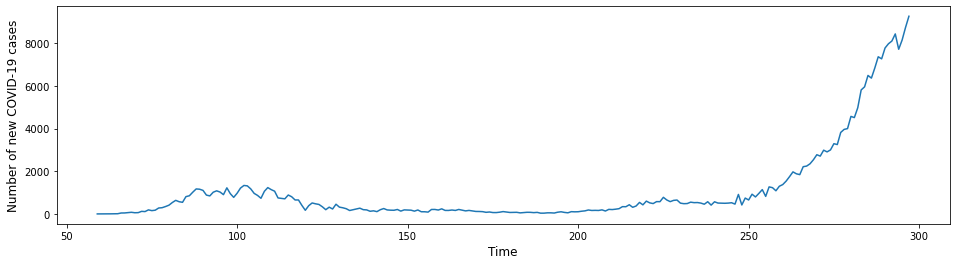

In [49]:
y = df_nl.reset_index()['new_cases']
y = y[y>0]
fig, ax = plot_ys(y)
ax.set(xlabel="Time", ylabel="Number of new COVID-19 cases");

219 20


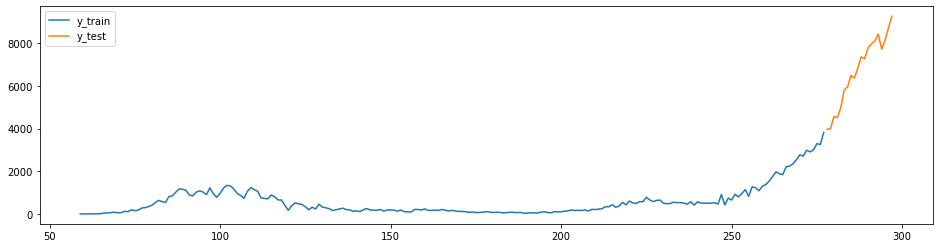

In [50]:
y_train, y_test = temporal_train_test_split(y, test_size=20)
plot_ys(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [51]:
fh = np.arange(len(y_test)) + 1

0.513047533043365

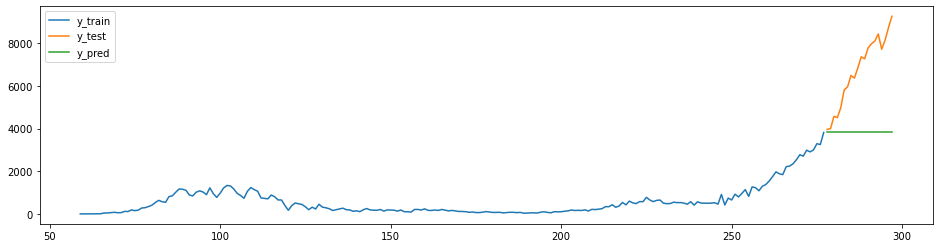

In [52]:
from sktime.forecasting.compose import ReducedRegressionForecaster
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=1)
forecaster = ReducedRegressionForecaster(regressor=regressor, window_length=12, strategy="recursive")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

C:\Users\klim_\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\klim_\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\klim_\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



0.19185420084231392

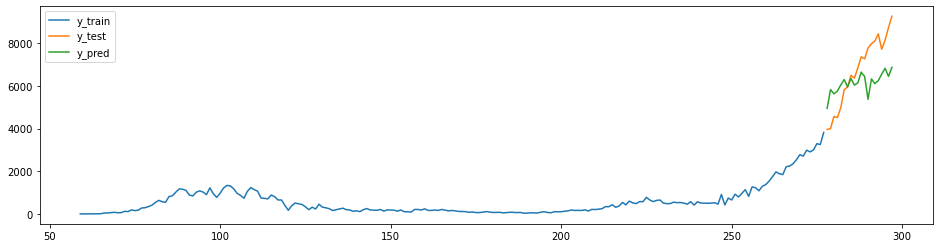

In [53]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
forecaster = ExponentialSmoothing(trend="add", seasonal="multiplicative", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

0.24236647324147048

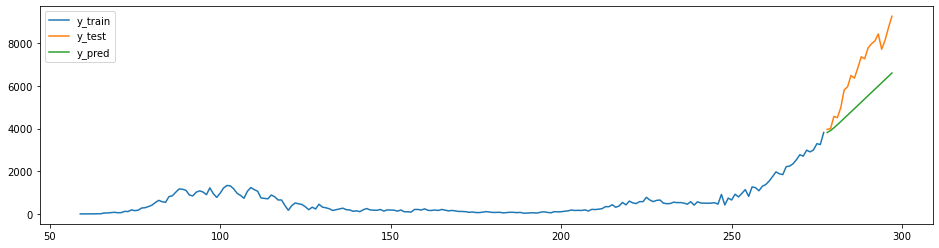

In [54]:
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(sp=12, suppress_warnings=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

C:\Users\klim_\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\klim_\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\klim_\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\klim_\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\klim_\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\klim_\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

0.293145481175862

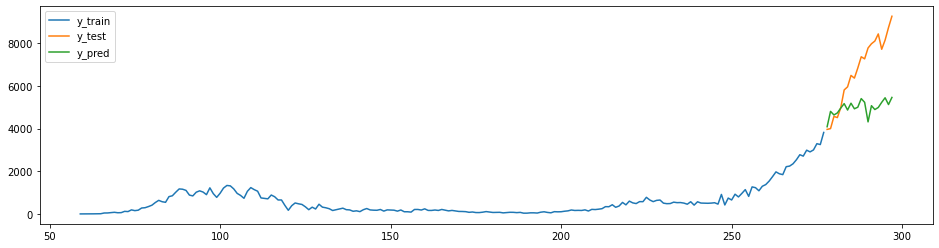

In [55]:
from sktime.forecasting.compose import EnsembleForecaster
forecaster = EnsembleForecaster([
    ("ses", ExponentialSmoothing(seasonal="multiplicative", sp=12)),
    ("holt", ExponentialSmoothing(trend="add", damped=False, seasonal="multiplicative", sp=12)),
    ("damped", ExponentialSmoothing(trend="add", damped=True, seasonal="multiplicative", sp=12))
])
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

In [56]:
from sktime.forecasting.model_selection import SlidingWindowSplitter, ForecastingGridSearchCV

forecaster = ReducedRegressionForecaster(regressor=regressor, window_length=15, strategy="recursive")
param_grid = {"window_length": [5, 10, 15]}

# we fit the forecaster on the initial window, and then use temporal cross-validation to find the optimal parameter
cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.5))
gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=param_grid)
gscv.fit(y_train)
y_pred = gscv.predict(fh)

0.513047533043365

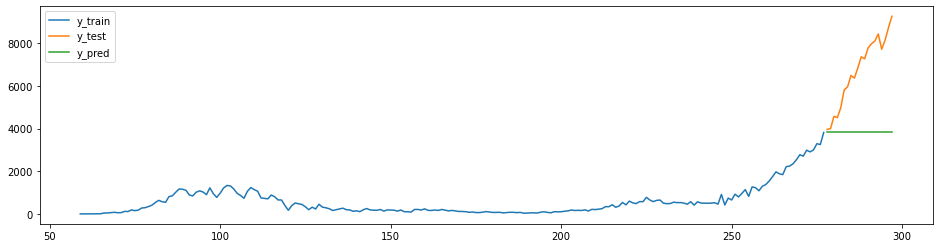

In [57]:
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

In [58]:
gscv.best_params_

{'window_length': 5}

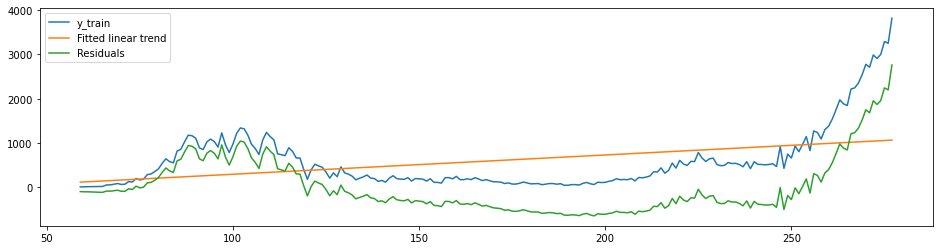

In [59]:
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformers.single_series.detrend import Detrender

# liner detrending
forecaster = PolynomialTrendForecaster(degree=1)
transformer = Detrender(forecaster=forecaster)
yt = transformer.fit_transform(y_train)

# internally, the Detrender uses the in-sample predictions of the PolynomialTrendForecaster
forecaster = PolynomialTrendForecaster(degree=1)
fh_ins = -np.arange(len(y_train)) # in-sample forecasting horizon
y_pred = forecaster.fit(y_train).predict(fh=fh_ins)

plot_ys(y_train, y_pred, yt, labels=["y_train", "Fitted linear trend", "Residuals"]);

0.5007492563234359

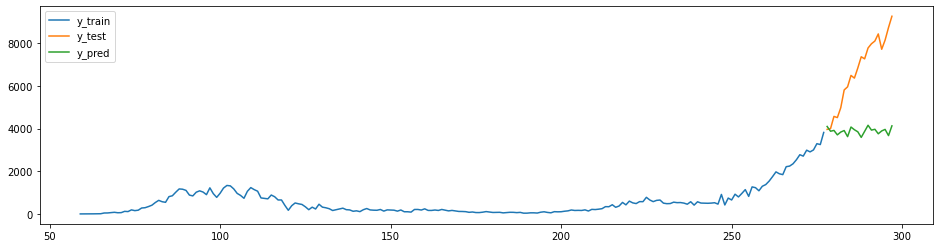

In [60]:
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.transformers.single_series.detrend import Deseasonalizer

forecaster = TransformedTargetForecaster([
    ("deseasonalise", Deseasonalizer(model="multiplicative", sp=12)),
    ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),
    ("forecast", ReducedRegressionForecaster(regressor=regressor, window_length=15, strategy="recursive"))
])
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

In [61]:
from sktime.forecasting.naive import NaiveForecaster
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)
cv = SlidingWindowSplitter(fh=1)
y_pred = forecaster.update_predict(y_test, cv)
smape_loss(y_test, y_pred)

0.057657337370865

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

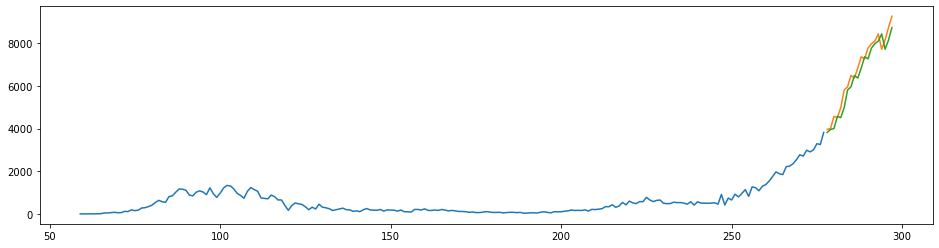

In [62]:
plot_ys(y_train, y_test, y_pred)

C:\Users\klim_\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\klim_\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



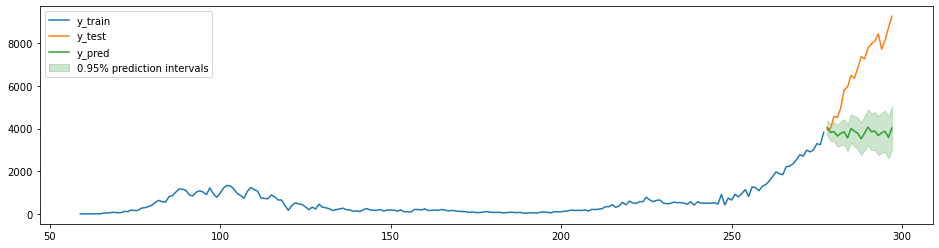

In [63]:
from sktime.forecasting.theta import ThetaForecaster
forecaster = ThetaForecaster(sp=12)
forecaster.fit(y_train)
alpha = 0.05  # 95% prediction intervals
y_pred, pred_ints = forecaster.predict(fh, return_pred_int=True, alpha=alpha)
smape_loss(y_test, y_pred)

fig, ax = plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
ax.fill_between(y_pred.index, pred_ints["lower"], pred_ints["upper"], alpha=0.2, color="green", label=f"{1 - alpha}% prediction intervals")
plt.legend();